## Applying Random Forest Regressor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [4]:
particle_data = pd.read_csv('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam Ti64 Powders/FlowCamTi64.csv')#
particle_data = particle_data.loc[(particle_data['Diameter (ABD) (µm)'] >= 40) & (particle_data['Diameter (ABD) (µm)'] <= 100)]
particle_data = particle_data.dropna()
particle_data

,Unnamed: 0,Name,Area (ABD) (µm²),Area (Filled) (µm²),Aspect Ratio,Average Blue,Average Green,Average Red,Biovolume (Cylinder) (µm³),Biovolume (P. Spheroid) (µm³),...,Symmetry,Transparency,UUID,Volume (ABD) (µm³),Volume (ESD) (µm³),Width (µm),Tag,Lot,Rev,GroupID
0,0,2024-10-30 P2002 Group 3 Rev 1 R01_PP2,2012.06,2012.06,0.91,0.0,0.0,0.0,101259.15,65576.08,...,0.78,0.05,782F392696C411EF937150EBF6EE7050,67892.88,80284.23,48.54,2024-10-30 P2002 Group 3 Rev 1 R01_PP2 exporte...,P2002,1,3
1,1,2024-10-30 P2002 Group 3 Rev 1 R01_PP2,7535.08,7535.08,0.98,0.0,0.0,0.0,526202.46,487635.14,...,0.96,0.02,782F3B5C96C411EF937150EBF6EE7050,492034.79,517631.96,96.16,2024-10-30 P2002 Group 3 Rev 1 R01_PP2 exporte...,P2002,1,3
2,2,2024-10-30 P2002 Group 3 Rev 1 R01_PP2,3533.38,3533.38,0.94,0.0,0.0,0.0,200193.70,153653.75,...,0.80,0.03,782F3D7E96C411EF937150EBF6EE7050,157997.02,172696.02,65.02,2024-10-30 P2002 Group 3 Rev 1 R01_PP2 exporte...,P2002,1,3
3,3,2024-10-30 P2002 Group 3 Rev 1 R01_PP2,5630.42,5630.42,0.94,0.0,0.0,0.0,363665.40,307401.18,...,0.94,0.02,782F3F9796C411EF937150EBF6EE7050,317815.07,339986.52,81.51,2024-10-30 P2002 Group 3 Rev 1 R01_PP2 exporte...,P2002,1,3
4,4,2024-10-30 P2002 Group 3 Rev 1 R01_PP2,4735.05,4735.05,0.96,0.0,0.0,0.0,296191.15,240101.58,...,0.91,0.03,782F41CF96C411EF937150EBF6EE7050,245104.03,266349.48,77.84,2024-10-30 P2002 Group 3 Rev 1 R01_PP2 exporte...,P2002,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39267,39267,2024-10-29 P1444 Group 1 Rev 9 R01_PP2,2032.26,2032.26,0.96,0.0,0.0,0.0,91520.22,67346.39,...,0.89,0.03,CEBE5EE8962B11EF937150EBF6EE7050,68917.95,75571.67,50.37,2024-10-29 P1444 Group 1 Rev 9 R01_PP2 exporte...,P1444,9,1
39269,39269,2024-10-29 P1444 Group 1 Rev 9 R01_PP2,1690.90,1690.90,0.99,0.0,0.0,0.0,70625.15,52313.92,...,0.89,0.03,CEBE62EB962B11EF937150EBF6EE7050,52304.47,58194.03,46.71,2024-10-29 P1444 Group 1 Rev 9 R01_PP2 exporte...,P1444,9,1
39270,39270,2024-10-29 P1444 Group 1 Rev 9 R01_PP2,1885.41,1885.41,0.97,0.0,0.0,0.0,78279.69,60625.90,...,0.91,0.03,CEBE64E7962B11EF937150EBF6EE7050,61584.50,67112.59,48.54,2024-10-29 P1444 Group 1 Rev 9 R01_PP2 exporte...,P1444,9,1
39271,39271,2024-10-29 P1444 Group 1 Rev 9 R01_PP2,2439.02,2439.02,0.93,0.0,0.0,0.0,124922.67,87156.88,...,0.89,0.04,CEBE66E9962B11EF937150EBF6EE7050,90612.29,101895.31,54.03,2024-10-29 P1444 Group 1 Rev 9 R01_PP2 exporte...,P1444,9,1


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def randomforestregressor(particle_data, targets, features):
    result_list = []
    X = particle_data[features]

    for target in targets:
        if particle_data[target].isna().all():
            continue
        
        # Initialize random forest regressor 
        rf = RandomForestRegressor(n_estimators=100, random_state=4400)
        y = particle_data[[target]].values.ravel()

        # Split data into test and training 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4400)
        
        # Fit and predict 
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)

        # Calculate MSE
        mse = mean_squared_error(y_test, y_pred)

        # Calculate average and standard deviation
        avg_value = particle_data[target].mean()
        std_value = particle_data[target].std()

        # Append results to the list
        result_list.append({
            'Feature': target,
            'Average': avg_value,
            'Standard Deviation': std_value,
            'MSE': mse
        })

        # Plot a tree for visualization
        fig, ax = plt.subplots(figsize=(12, 8))
        plot_tree(rf.estimators_[0], ax=ax, filled=True, feature_names=features)
        plt.title(f"Tree Plot for Feature: {target}")
        plt.show()

    # Create a result table
    result_table = pd.DataFrame(result_list)
    pd.set_option('display.float_format', '{:.6f}'.format)

    return result_table



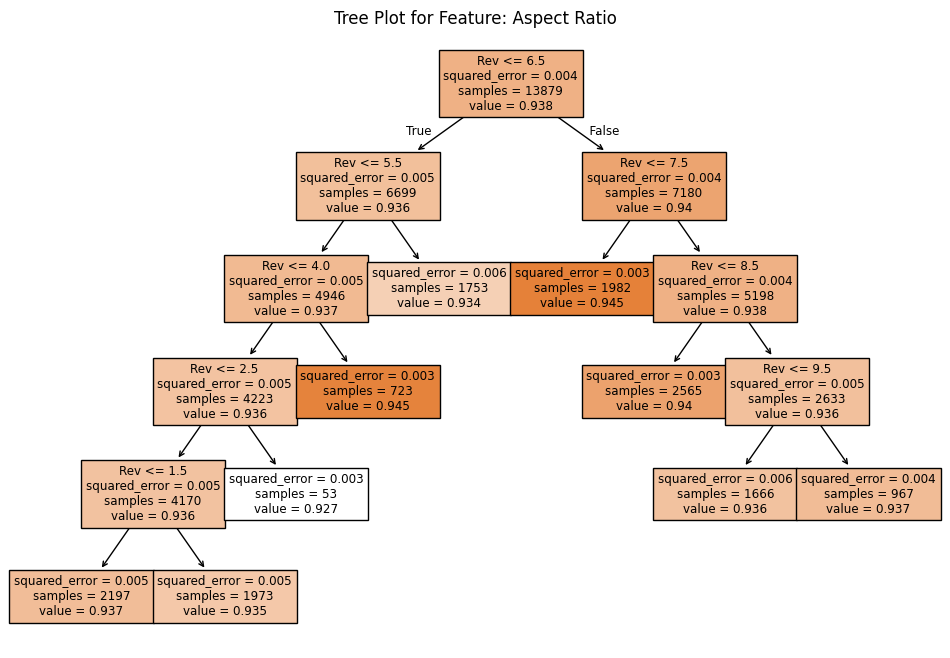

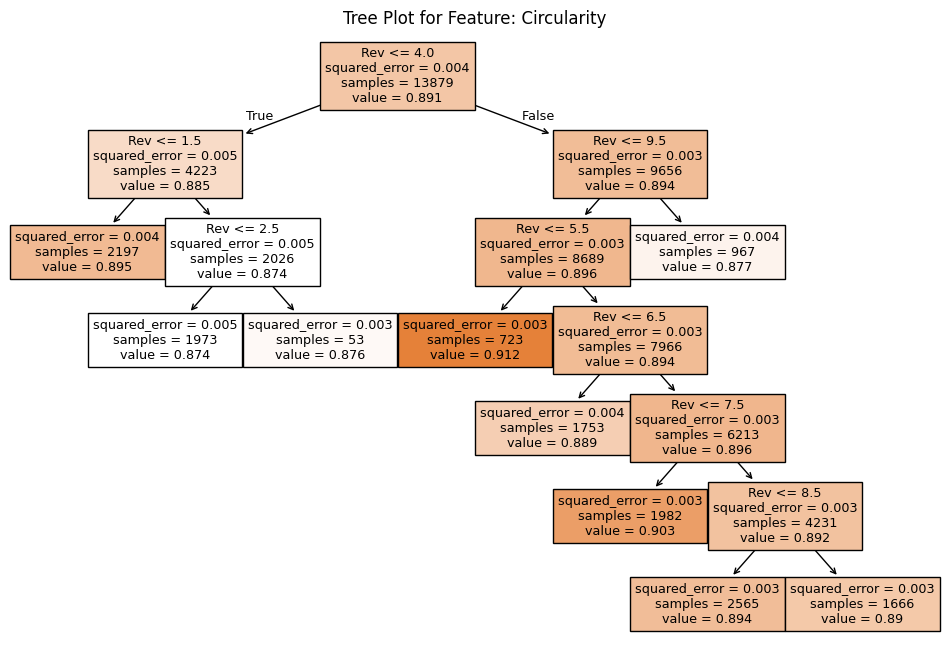

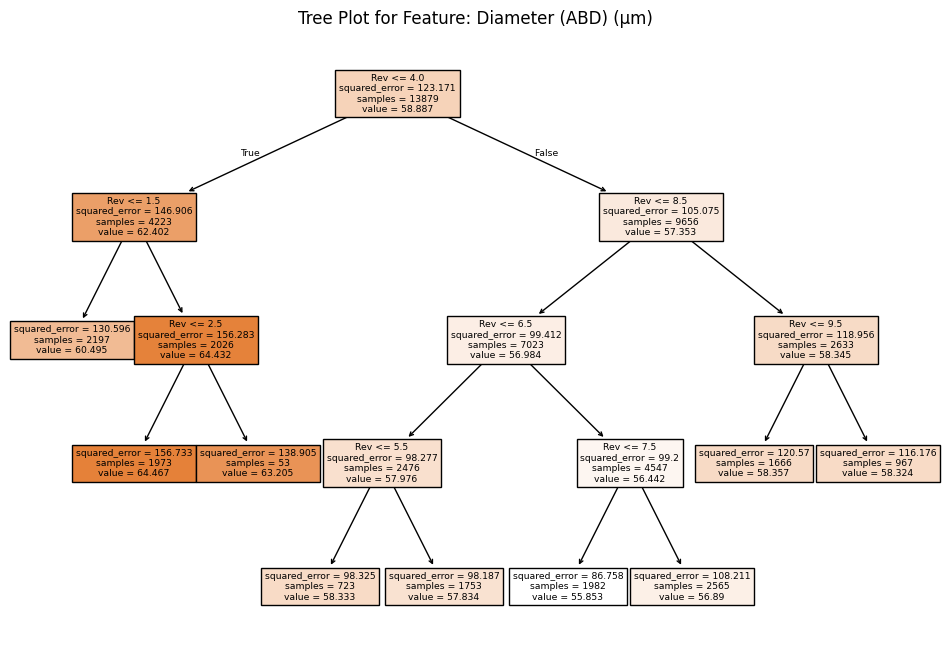

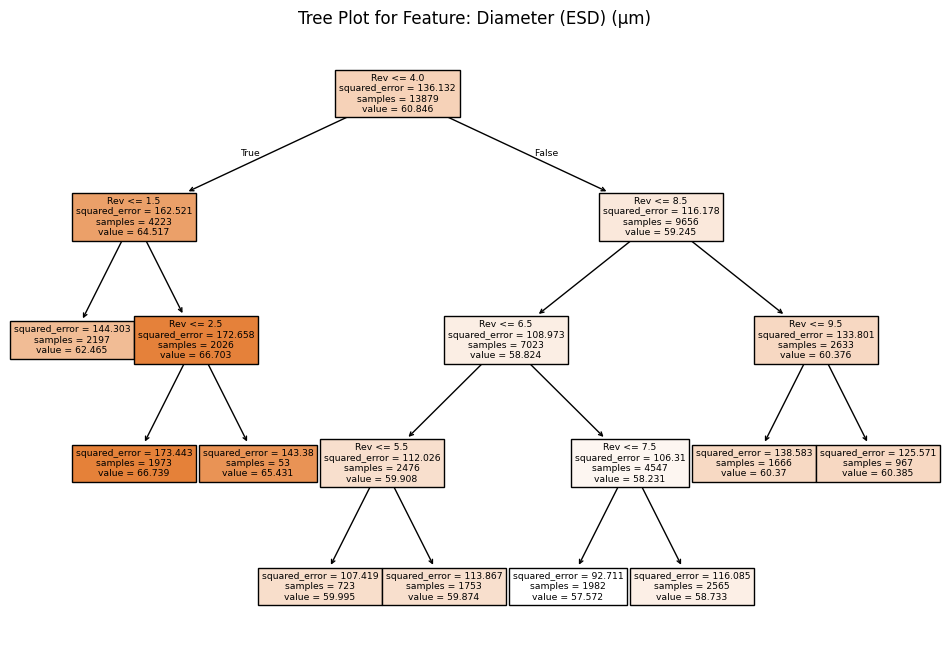

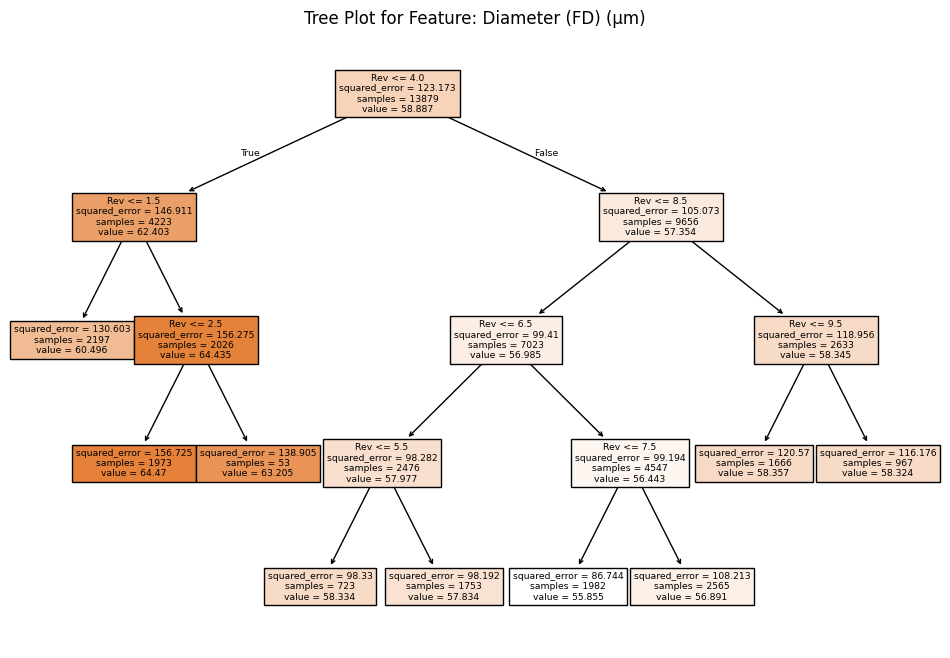

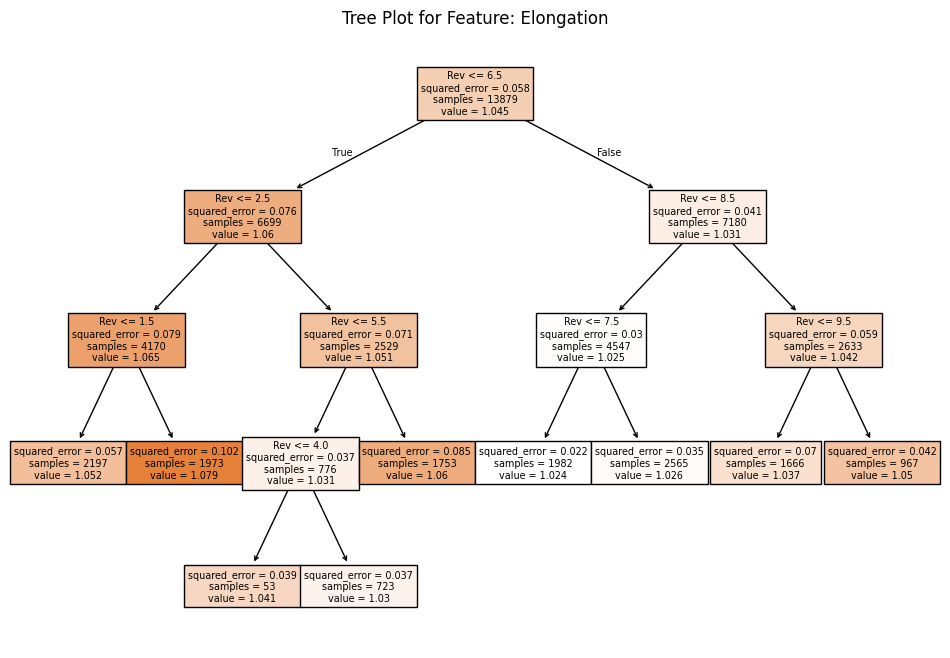

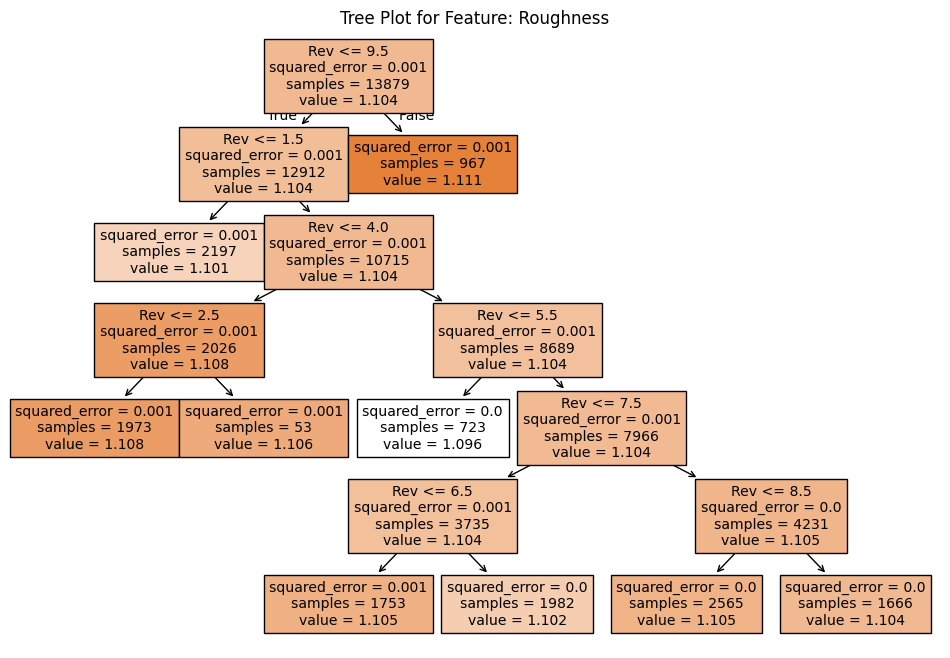

,Feature,Average,Standard Deviation,MSE
0,Aspect Ratio,0.937930,0.067361,0.004722
1,Circularity,0.890979,0.060871,0.003631
2,Diameter (ABD) (µm),58.886735,11.087042,116.450026
3,Diameter (ESD) (µm),60.846257,11.626074,128.184440
4,Diameter (FD) (µm),58.888009,11.087089,116.456948
5,Elongation,1.045463,0.244945,0.064771
6,Roughness,1.104347,0.024966,0.000633


In [8]:
features = ['Rev']
targets = ['Aspect Ratio','Circularity',
       'Diameter (ABD) (µm)', 'Diameter (ESD) (µm)', 'Diameter (FD) (µm)', 'Elongation', 'Roughness']
rf = randomforestregressor(particle_data, targets=targets, features=features)
rf